In [1]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.enable_eager_execution()


train = pd.read_csv("digit-recognizer/train.csv")

In [2]:


train_x = train.loc[:,"pixel0":]
train_y = train.loc[:,"label"]

train_images = train_x / 256.
train_images = train_images.to_numpy()

print(train_images.shape)




(42000, 784)


(28, 28)


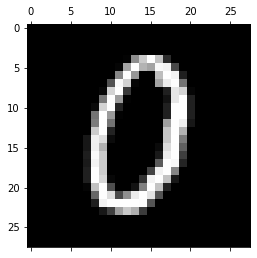

In [3]:
# show picture

one_pic = train_images[5]
one_pic = one_pic.reshape(28,28)
print(one_pic.shape)

plt.matshow(one_pic, cmap=plt.get_cmap('gray'))

In [4]:
# one layer version




# 將元件級的層定義清楚
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(784,activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
])

decoder = tf.keras.Sequential([
           
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
          
])

autoencoder = tf.keras.Sequential([
    encoder , 
    decoder ,
])  




In [5]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [6]:
#train_images = train_images.to_numpy()


autoencoder.fit(train_images  , train_images ,epochs=5)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 10s 248us/sample - loss: 0.0236
Epoch 2/5
42000/42000 [==============================] - 9s 208us/sample - loss: 0.0152
Epoch 3/5
42000/42000 [==============================] - 9s 208us/sample - loss: 0.0138
Epoch 4/5
42000/42000 [==============================] - 9s 209us/sample - loss: 0.0130
Epoch 5/5
42000/42000 [==============================] - 9s 210us/sample - loss: 0.0125


(28, 28)


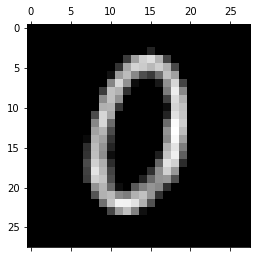

In [7]:


one_pic = train.loc[5,"pixel0":]
one_pic = one_pic.to_numpy()
one_pic = one_pic.reshape(1,784)
one_pic = autoencoder.predict(one_pic/256)
one_pic = one_pic.reshape(28,28)
print(one_pic.shape)

plt.matshow(one_pic, cmap=plt.get_cmap('gray'))

In [44]:
import numpy

one_pic = train_images[5]
one_pic = one_pic.reshape(1,784)

vector = encoder(one_pic).numpy()
print(vector)

[[ 95.057014    3.2991128   0.          0.          0.         54.18727
   75.90212    76.0453     27.019297    0.          0.          0.
   81.44365    12.215361   39.02267     0.        130.90895   102.78191
    1.6283069   0.          0.         61.564644   23.355001   40.62632
    0.         60.321873    0.         28.499002  117.30807   137.35852
   68.8325      0.         36.76481    22.51265   103.28131     0.
   60.185783    0.          0.        121.06594     0.          0.
   71.982666    0.         14.022621   97.63801    54.003967    0.
   38.713997    0.         10.232217    0.         64.12064     0.
  100.48294     6.767102    3.4900649   0.         78.95405    84.04832
   41.966667   73.93942     0.         53.629654 ]]


In [53]:
# CNN autoencoder

train_images_reshape = train_images.reshape(42000,28,28,1)

encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
])


decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

autoencoder = tf.keras.Sequential([
    encoder , 
    decoder ,
])  

In [62]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
autoencoder.fit(train_images_reshape  ,train_images_reshape  ,epochs=5)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 11s 266us/sample - loss: 0.0011
Epoch 2/5
42000/42000 [==============================] - 11s 261us/sample - loss: 9.2284e-04
Epoch 3/5
42000/42000 [==============================] - 11s 260us/sample - loss: 7.8961e-04
Epoch 4/5
42000/42000 [==============================] - 11s 261us/sample - loss: 7.3599e-04
Epoch 5/5
42000/42000 [==============================] - 11s 260us/sample - loss: 7.0221e-04


(1, 28, 28, 1)


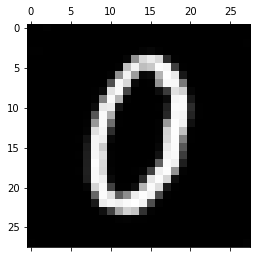

In [63]:
one_pic = train_images_reshape[5]
one_pic = one_pic.reshape(1,28,28,1)
one_pic = autoencoder.predict(one_pic)

print(one_pic.shape)
one_pic = one_pic.reshape(28,28)
plt.matshow(one_pic, cmap=plt.get_cmap('gray'))